In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv(r"User_enguagement_phonepe.csv")

In [20]:
df.head()

,State,Year,Quarter,Registered_Users,AppOpenings
0,andaman-&-nicobar-islands,2018,1,6740,0
1,andaman-&-nicobar-islands,2018,2,9405,0
2,andaman-&-nicobar-islands,2018,3,12149,0
3,andaman-&-nicobar-islands,2018,4,15222,0
4,andaman-&-nicobar-islands,2019,1,18596,0


In [21]:
df.tail()

,State,Year,Quarter,Registered_Users,AppOpenings
735,west-bengal,2021,4,20644527,512335839
736,west-bengal,2022,1,21919787,236131065
737,west-bengal,2022,2,23124388,250276369
738,west-bengal,2022,3,24372048,256445748
739,west-bengal,2022,4,25536381,678066327


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   State             740 non-null    object
 1   Year              740 non-null    int64 
 2   Quarter           740 non-null    int64 
 3   Registered_Users  740 non-null    int64 
 4   AppOpenings       740 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 29.0+ KB


In [24]:
# QR Code Usage Analysis
# Assuming 'AppOpenings' represents QR code usage for simplicity
qr_data = df.groupby(['State', 'Year', 'Quarter'])['AppOpenings'].sum().reset_index()
qr_data.head(10)

,State,Year,Quarter,AppOpenings
0,andaman-&-nicobar-islands,2018,1,0
1,andaman-&-nicobar-islands,2018,2,0
2,andaman-&-nicobar-islands,2018,3,0
3,andaman-&-nicobar-islands,2018,4,0
4,andaman-&-nicobar-islands,2019,1,0
5,andaman-&-nicobar-islands,2019,2,52640
6,andaman-&-nicobar-islands,2019,3,171107
7,andaman-&-nicobar-islands,2019,4,177012
8,andaman-&-nicobar-islands,2020,1,193586
9,andaman-&-nicobar-islands,2020,2,305072


In [28]:

state_usage = qr_data.groupby('State')['AppOpenings'].sum().reset_index()
state_usage

,State,AppOpenings
0,andaman-&-nicobar-islands,30239151
1,andhra-pradesh,13722337399
2,arunachal-pradesh,237984577
3,assam,1928702082
4,bihar,4949547310
5,chandigarh,83551087
6,chhattisgarh,3153154188
7,dadra-&-nagar-haveli-&-daman-&-diu,97314971
8,delhi,2711944871
9,goa,215475239


In [33]:
# in this column one raw having india state but in real world that is not possible so remove that raw
state_usage = state_usage.loc[state_usage['State'] != 'india']

In [34]:
# Select top 10 states based on QR code usage
top_states = state_usage.nlargest(10, 'AppOpenings')  # Change 10 to 5 for top 5 states
top_states

,State,AppOpenings
21,maharashtra,20014077598
16,karnataka,18270997380
29,rajasthan,16708044297
1,andhra-pradesh,13722337399
32,telangana,12684892712
20,madhya-pradesh,11819718275
34,uttar-pradesh,10226840000
31,tamil-nadu,6434234065
26,odisha,5625191927
10,gujarat,5084900499


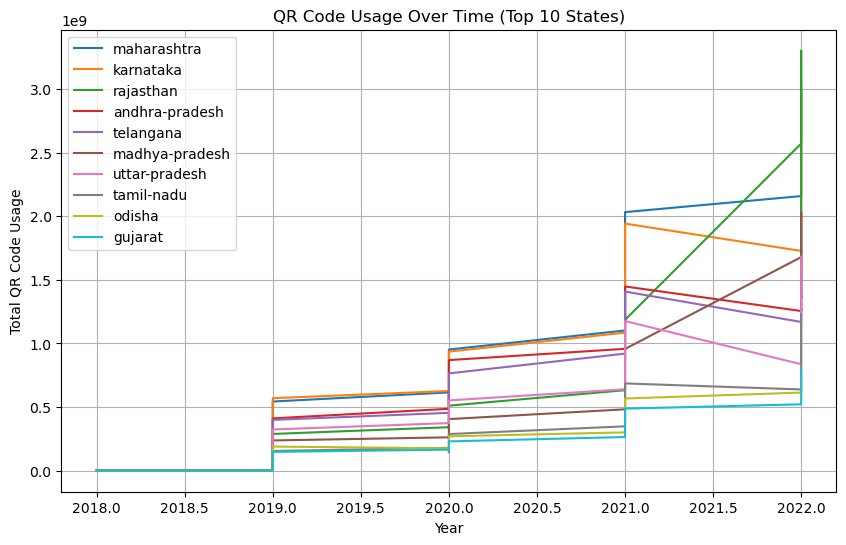

In [35]:
plt.figure(figsize=(10, 6))
for state in top_states['State']:
    state_data = qr_data[qr_data['State'] == state]
    plt.plot(state_data['Year'], state_data['AppOpenings'], label=state)
plt.title('QR Code Usage Over Time (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('Total QR Code Usage')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Customer Retention Analysis
retention_data = df.groupby(['State', 'Year'])['Registered_Users'].mean().reset_index()
retention_data

,State,Year,Registered_Users
0,andaman-&-nicobar-islands,2018,10879.00
1,andaman-&-nicobar-islands,2019,22554.50
2,andaman-&-nicobar-islands,2020,38702.25
3,andaman-&-nicobar-islands,2021,64653.75
4,andaman-&-nicobar-islands,2022,82475.50
...,...,...,...
180,west-bengal,2018,4392400.50
181,west-bengal,2019,9147625.00
182,west-bengal,2020,13823325.75
183,west-bengal,2021,18689145.75


In [53]:
# Calculate total registered users for each state
state_retention = retention_data.groupby('State')['Registered_Users'].sum().reset_index()
state_retention

,State,Registered_Users
0,andaman-&-nicobar-islands,2.192650e+05
1,andhra-pradesh,7.621161e+07
2,arunachal-pradesh,9.809442e+05
3,assam,1.362547e+07
4,bihar,5.731714e+07
5,chandigarh,1.782853e+06
6,chhattisgarh,1.844608e+07
7,dadra-&-nagar-haveli-&-daman-&-diu,1.330117e+06
8,delhi,4.467821e+07
9,goa,2.323849e+06


In [57]:
# Remove the row for "India"
state_retention = state_retention.loc[state_retention['State'] != 'india']


In [58]:
# Select top 10 states based on registered users
top_states_retention = state_retention.nlargest(10, 'Registered_Users')
top_states_retention

,State,Registered_Users
21,maharashtra,1.530661e+08
34,uttar-pradesh,1.216009e+08
16,karnataka,9.869498e+07
1,andhra-pradesh,7.621161e+07
29,rajasthan,7.341516e+07
32,telangana,7.134615e+07
36,west-bengal,6.979065e+07
31,tamil-nadu,6.641271e+07
20,madhya-pradesh,6.155675e+07
10,gujarat,6.121499e+07


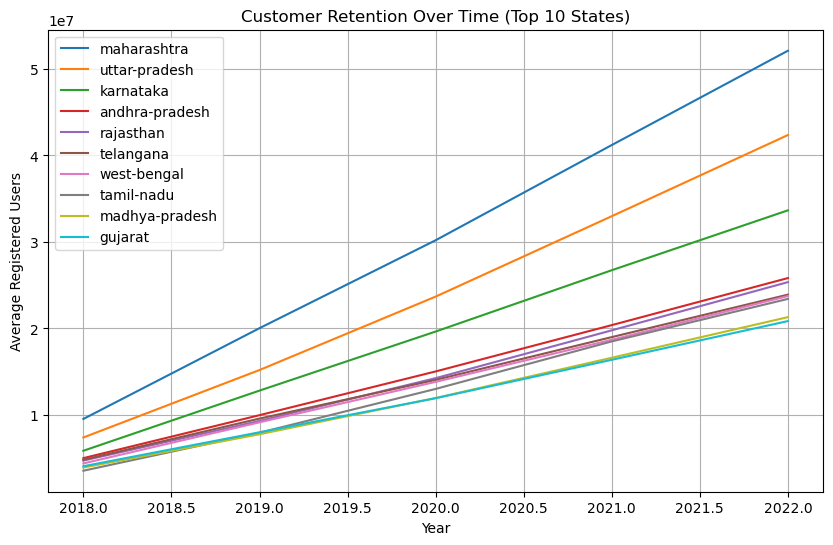

In [59]:
# Visualize Customer Retention over time for top states
plt.figure(figsize=(10, 6))
for state in top_states_retention['State']:
    state_data = retention_data[retention_data['State'] == state]
    plt.plot(state_data['Year'], state_data['Registered_Users'], label=state)
plt.title('Customer Retention Over Time (Top 10 States)')
plt.xlabel('Year')
plt.ylabel('Average Registered Users')
plt.legend()
plt.grid(True)
plt.show()